In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Historic_Crypto import HistoricalData
from sklearn.preprocessing import MinMaxScaler

sns.set(rc={'figure.figsize':(30, 12)})

In [3]:
START_DATE = "2017-01-01-00-00"
END_DATE = "2023-04-01-00-00"

try:
    eth_df = pd.read_csv("eth.csv")
except:
    eth_df = HistoricalData('ETH-USD', 3600, START_DATE, END_DATE).retrieve_data()
    eth_df.to_csv("eth.csv", index=False)

sent_df = pd.read_csv("sent_df_hour.csv")
sent_df = sent_df[:len(eth_df)]

FileNotFoundError: [Errno 2] No such file or directory: 'sent_df_hour.csv'

In [ ]:
eth_df.head()

,low,high,open,close,volume
0,8.25,8.30,8.26,8.30,1610.315200
1,8.30,8.53,8.30,8.47,3139.987090
2,8.45,8.60,8.45,8.59,3503.826085
3,8.49,8.60,8.58,8.53,1693.233010
4,8.34,8.54,8.53,8.38,2223.611356


In [ ]:
print(eth_df.head().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &   low &  high &  open &  close &       volume \\
\midrule
0 &  8.25 &  8.30 &  8.26 &   8.30 &  1610.315200 \\
1 &  8.30 &  8.53 &  8.30 &   8.47 &  3139.987090 \\
2 &  8.45 &  8.60 &  8.45 &   8.59 &  3503.826085 \\
3 &  8.49 &  8.60 &  8.58 &   8.53 &  1693.233010 \\
4 &  8.34 &  8.54 &  8.53 &   8.38 &  2223.611356 \\
\bottomrule
\end{tabular}



C:\Users\HEX\AppData\Local\Temp\ipykernel_28528\2321028228.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(eth_df.head().to_latex())


In [ ]:
eth_df.describe()

,low,high,open,close,volume
count,48647.000000,48647.000000,48647.000000,48647.000000,48647.000000
mean,949.099156,963.295755,956.512399,956.546269,7841.863990
std,1179.649125,1195.776955,1188.051274,1188.050337,9900.998488
min,0.100000,8.160000,8.090000,8.100000,0.568451
25%,183.665000,185.695000,184.710000,184.715000,2496.999621
50%,327.700000,332.400000,330.310000,330.340000,4818.732141
75%,1331.635000,1357.740000,1345.720000,1346.585000,9273.992657
max,4835.150000,4867.810000,4849.040000,4849.040000,179904.541935


In [ ]:
print(eth_df.describe().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &           low &          high &          open &         close &         volume \\
\midrule
count &  48647.000000 &  48647.000000 &  48647.000000 &  48647.000000 &   48647.000000 \\
mean  &    949.099156 &    963.295755 &    956.512399 &    956.546269 &    7841.863990 \\
std   &   1179.649125 &   1195.776955 &   1188.051274 &   1188.050337 &    9900.998488 \\
min   &      0.100000 &      8.160000 &      8.090000 &      8.100000 &       0.568451 \\
25\%   &    183.665000 &    185.695000 &    184.710000 &    184.715000 &    2496.999621 \\
50\%   &    327.700000 &    332.400000 &    330.310000 &    330.340000 &    4818.732141 \\
75\%   &   1331.635000 &   1357.740000 &   1345.720000 &   1346.585000 &    9273.992657 \\
max   &   4835.150000 &   4867.810000 &   4849.040000 &   4849.040000 &  179904.541935 \\
\bottomrule
\end{tabular}



C:\Users\HEX\AppData\Local\Temp\ipykernel_28528\4039674478.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(eth_df.describe().to_latex())


In [ ]:
sent_df["datetime"] = pd.to_datetime(sent_df["datetime"])
eth_df["datetime"] = sent_df["datetime"] # append our datetime to the eth_df as well

In [ ]:
# sent_df["datetime"] = pd.to_datetime(sent_df["year"].astype(str) + "-" + sent_df["month"].astype(str) + "-" + sent_df["day"].astype(str) + " " + sent_df["hour"].astype(str) + ":00")
# sent_df.sort_values(by="datetime", inplace=True)
# sent_df.drop(["year", "month", "day", "hour"], axis=1, inplace=True)
# sent_df.reset_index(inplace=True, drop=True)
# sent_df["hour_index"] = sent_df.index
sent_df.head()

,avg_sentiment_num,num_tweets,datetime,hour_index
0,0.000000,32,2017-01-01 00:00:00,0
1,0.000000,19,2017-01-01 01:00:00,1
2,0.052632,38,2017-01-01 02:00:00,2
3,0.000000,22,2017-01-01 03:00:00,3
4,0.000000,40,2017-01-01 04:00:00,4


In [ ]:
print(sent_df[["avg_sentiment_num", "num_tweets"]].head().to_latex())

\begin{tabular}{lrr}
\toprule
{} &  avg\_sentiment\_num &  num\_tweets \\
\midrule
0 &           0.000000 &          32 \\
1 &           0.000000 &          19 \\
2 &           0.052632 &          38 \\
3 &           0.000000 &          22 \\
4 &           0.000000 &          40 \\
\bottomrule
\end{tabular}



C:\Users\HEX\AppData\Local\Temp\ipykernel_28528\1856792040.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sent_df[["avg_sentiment_num", "num_tweets"]].head().to_latex())


In [ ]:
sent_df[["avg_sentiment_num", "num_tweets"]].describe()

,avg_sentiment_num,num_tweets
count,48647.000000,48647.000000
mean,0.084733,2986.499949
std,0.055137,4566.850529
min,-0.820000,19.000000
25%,0.050000,481.000000
50%,0.080000,836.000000
75%,0.110000,2746.000000
max,0.690000,30809.000000


In [ ]:
print(sent_df[["avg_sentiment_num", "num_tweets"]].describe().to_latex())

\begin{tabular}{lrr}
\toprule
{} &  avg\_sentiment\_num &    num\_tweets \\
\midrule
count &       48647.000000 &  48647.000000 \\
mean  &           0.084733 &   2986.499949 \\
std   &           0.055137 &   4566.850529 \\
min   &          -0.820000 &     19.000000 \\
25\%   &           0.050000 &    481.000000 \\
50\%   &           0.080000 &    836.000000 \\
75\%   &           0.110000 &   2746.000000 \\
max   &           0.690000 &  30809.000000 \\
\bottomrule
\end{tabular}



C:\Users\HEX\AppData\Local\Temp\ipykernel_28528\2532603962.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sent_df[["avg_sentiment_num", "num_tweets"]].describe().to_latex())


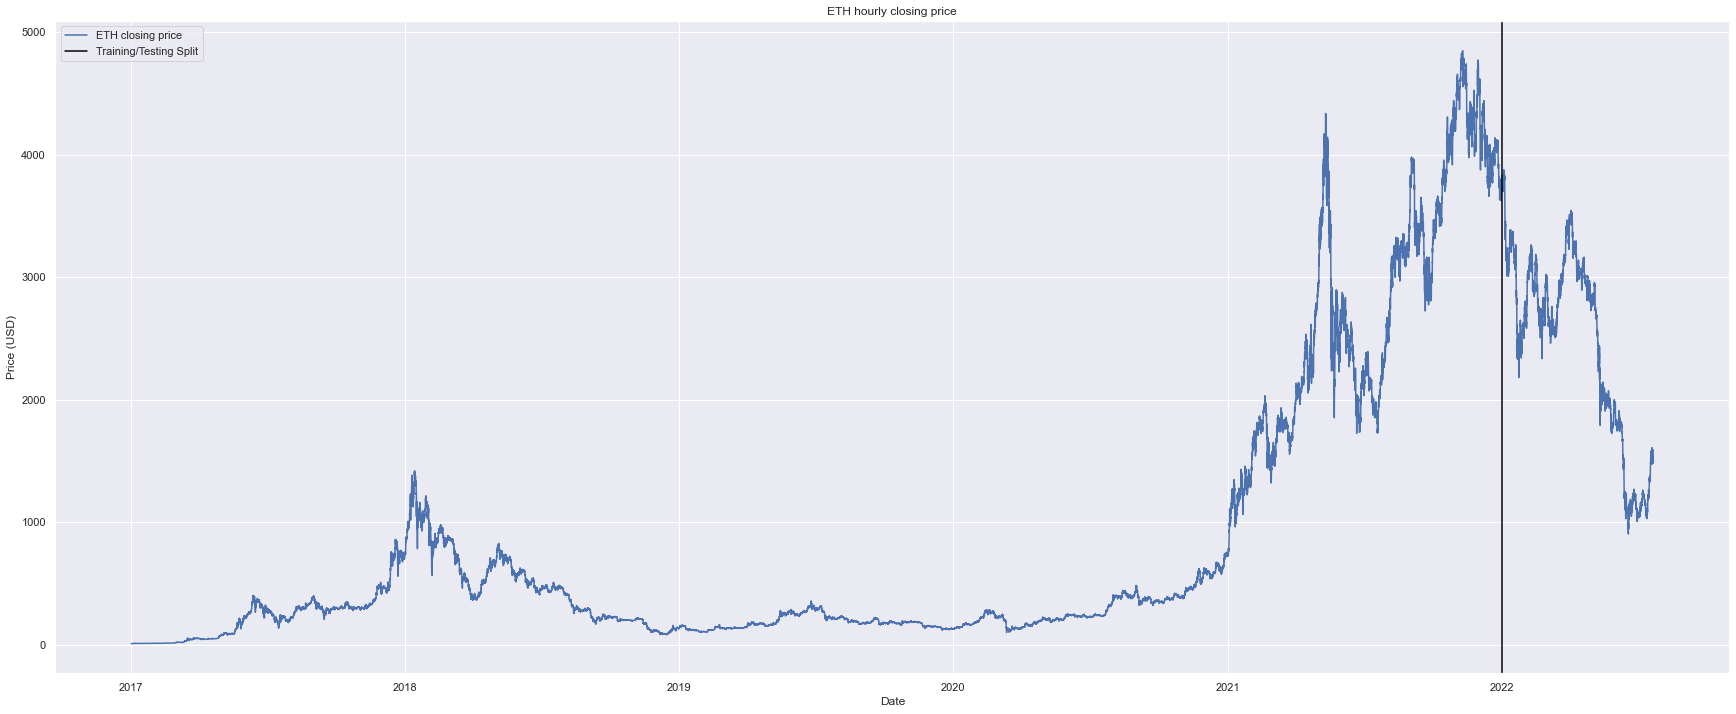

In [ ]:
sns.lineplot(x=eth_df["datetime"], y=eth_df["close"], label="ETH closing price").set(title='ETH hourly closing price', xlabel='Date', ylabel='Price (USD)')
plt.axvline(x = pd.to_datetime("2022-01-01 00:00:00"), color = 'black', label = 'Training/Testing Split')
plt.legend(loc='upper left');

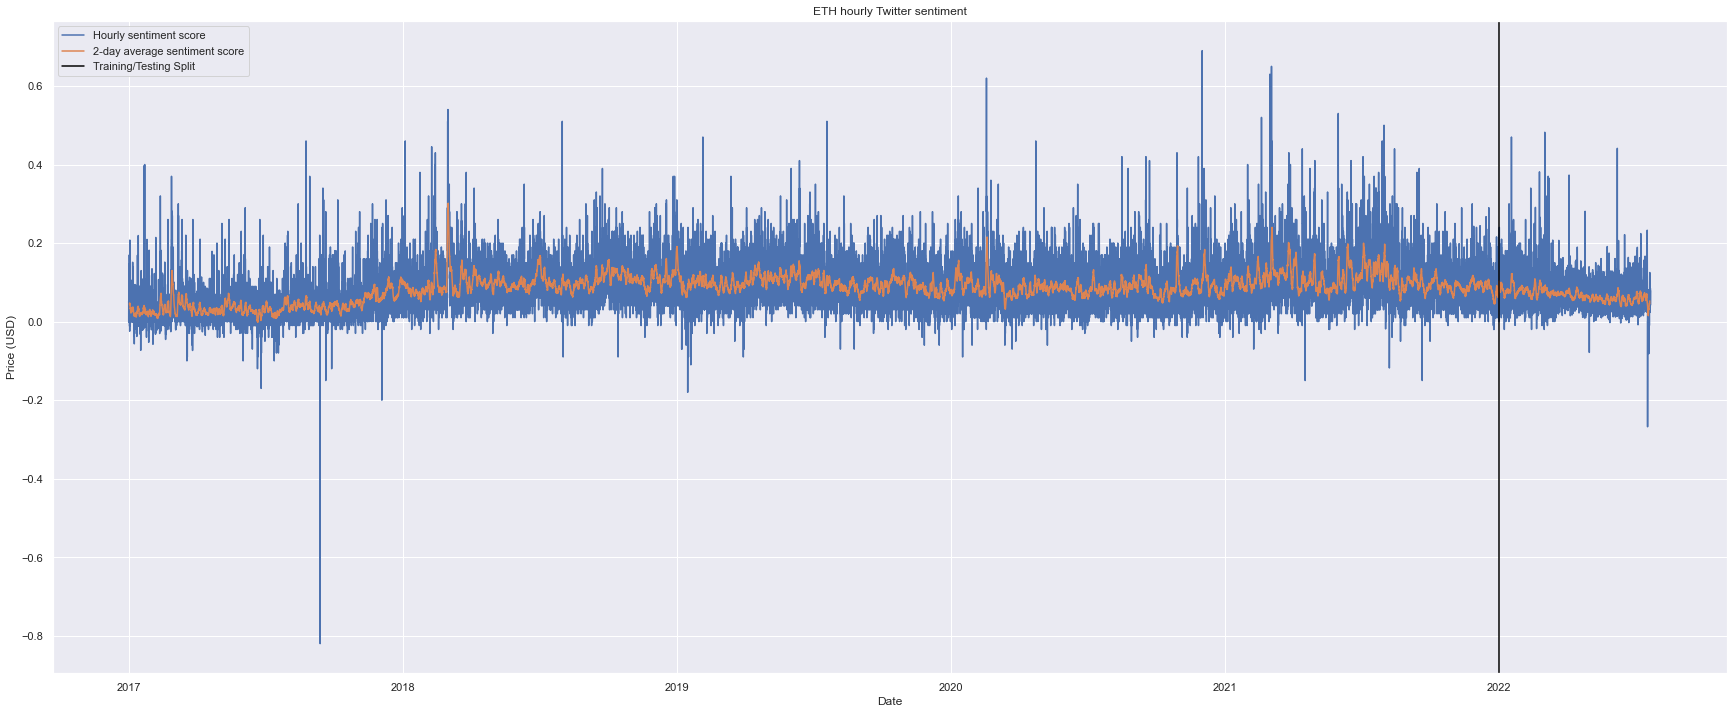

In [ ]:
sent_df['2d_avg_sentiment'] = sent_df['avg_sentiment_num'].rolling(48).mean().shift(-24)
sns.lineplot(x=sent_df["datetime"], y=sent_df["avg_sentiment_num"], label="Hourly sentiment score").set(title='ETH hourly Twitter sentiment', xlabel='Date', ylabel='Price (USD)')
sns.lineplot(x="datetime", y="2d_avg_sentiment", label="2-day average sentiment score", data=sent_df)
plt.axvline(x = pd.to_datetime("2022-01-01 00:00:00"), color = 'black', label = 'Training/Testing Split')
plt.legend(loc='upper left');

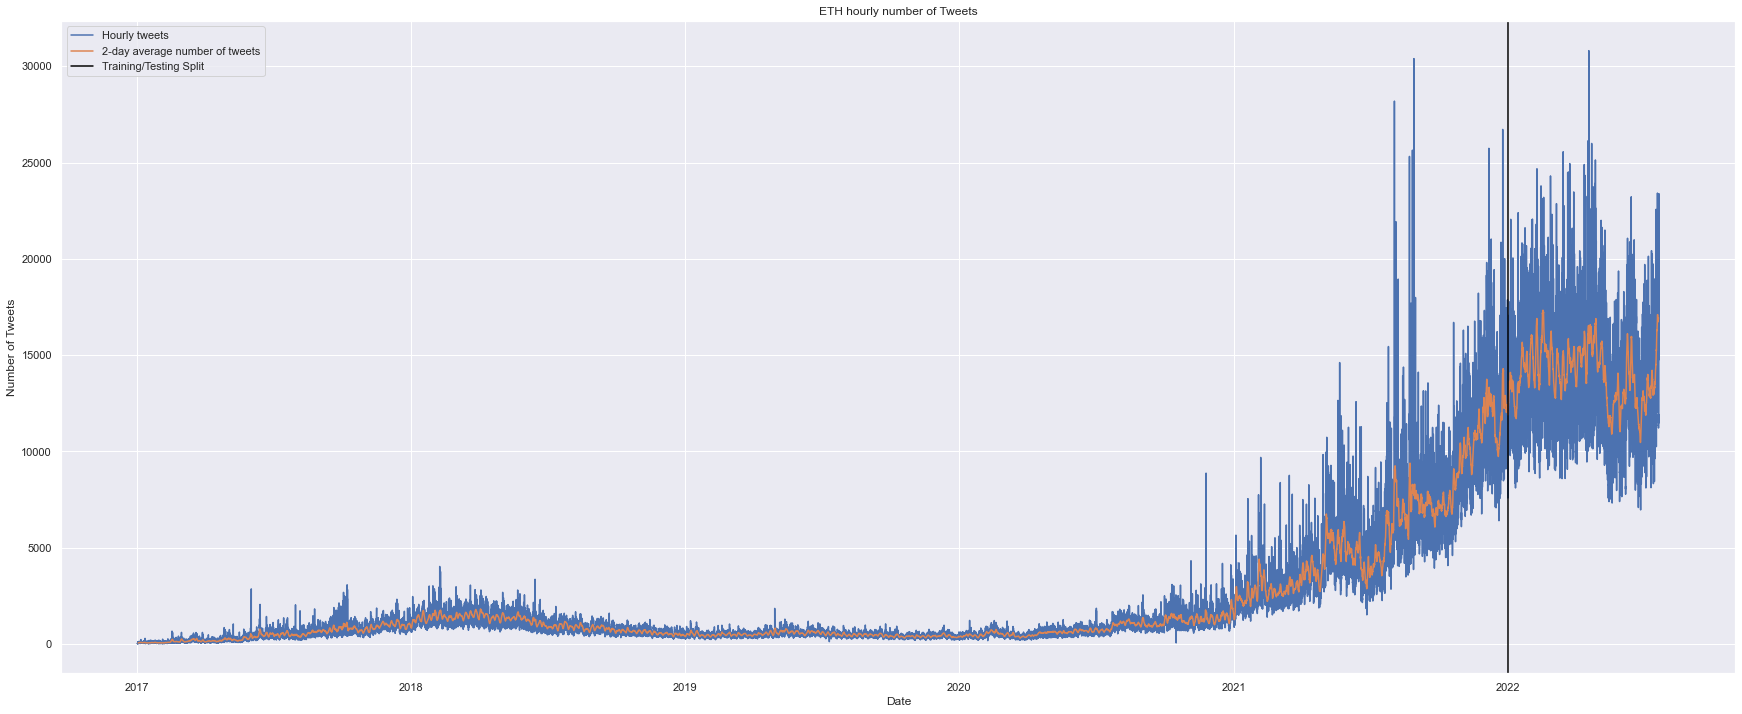

In [ ]:
sent_df['2d_avg_num_tweets'] = sent_df['num_tweets'].rolling(48).mean().shift(-24)
sns.lineplot(x=sent_df["datetime"], y=sent_df["num_tweets"], label="Hourly tweets").set(title='ETH hourly number of Tweets', xlabel='Date', ylabel='Number of Tweets')
sns.lineplot(x="datetime", y="2d_avg_num_tweets", label="2-day average number of tweets", data=sent_df)
plt.axvline(x = pd.to_datetime("2022-01-01 00:00:00"), color = 'black', label = 'Training/Testing Split')
plt.legend(loc='upper left');

In [ ]:
# use the 4-day rolling average to smooth outliers
top_positive = sent_df.sort_values(by="2d_avg_sentiment", ascending=False).head(500)
top_positive["close"] = eth_df.loc[eth_df["datetime"] == eth_df["datetime"], 'close']
top_negative = sent_df.sort_values(by="2d_avg_sentiment", ascending=True).head(500)
top_negative["close"] = eth_df.loc[eth_df["datetime"] == eth_df["datetime"], 'close']

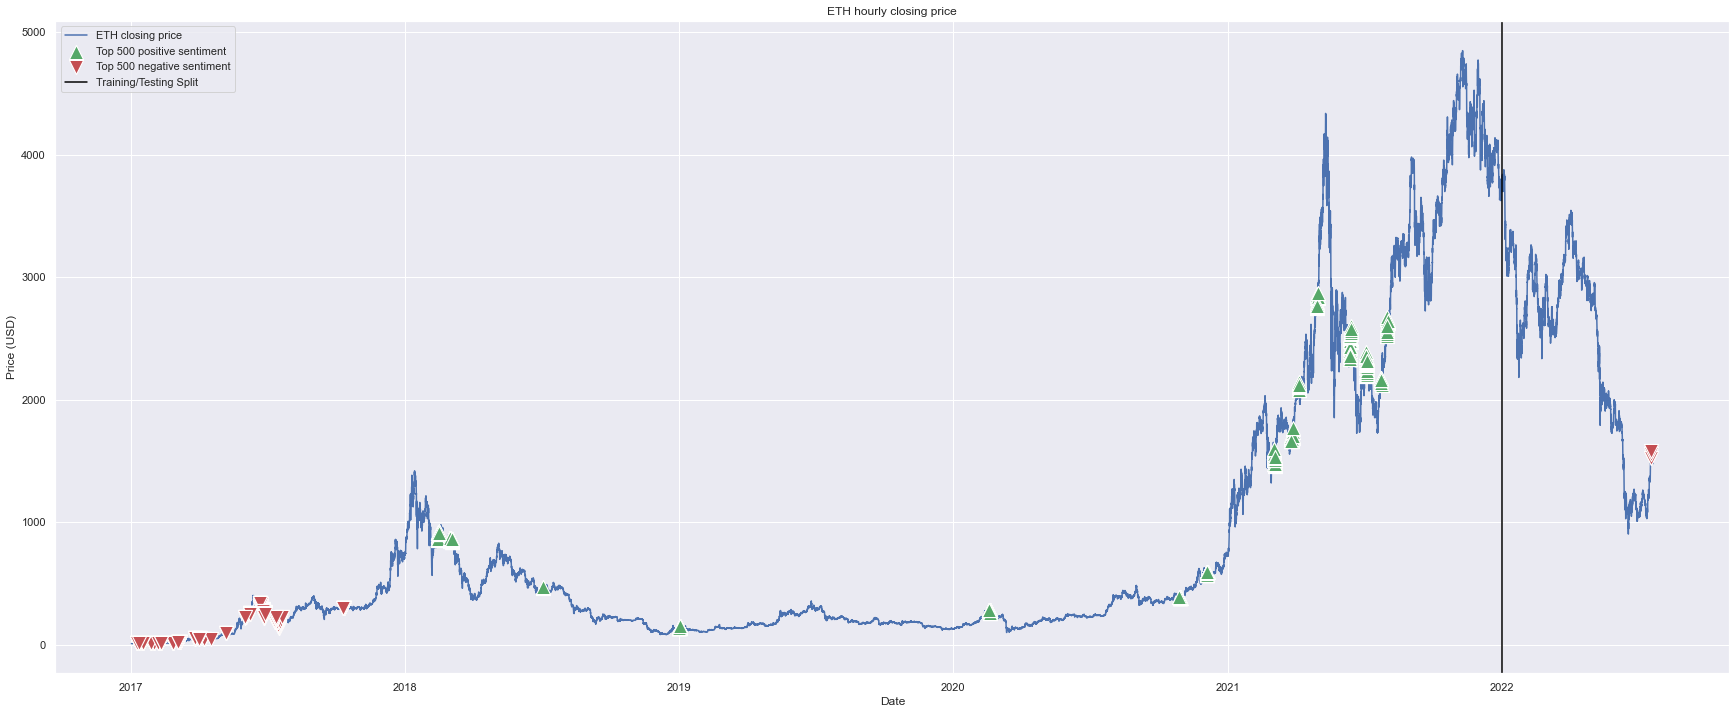

In [ ]:
sns.lineplot(x=eth_df["datetime"], y=eth_df["close"], label="ETH closing price").set(title='ETH hourly closing price', xlabel='Date', ylabel='Price (USD)')
sns.scatterplot(x="datetime", y="close", data=top_positive, color='g', marker="^", s=200, label="Top 500 positive sentiment", zorder=11)
sns.scatterplot(x="datetime", y="close", data=top_negative, color='r', marker="v", s=200, label="Top 500 negative sentiment", zorder=12)
plt.axvline(x=pd.to_datetime("2022-01-01 00:00:00"), color='black', label='Training/Testing Split')
plt.legend(loc='upper left');

In [ ]:
# minmax scale our data
mm_sent_df = pd.concat([sent_df['datetime'], sent_df['avg_sentiment_num'], sent_df['num_tweets'], sent_df['2d_avg_sentiment'], sent_df['2d_avg_num_tweets']], axis=1)
mm_eth_df = pd.concat([sent_df['datetime'], eth_df["close"]], axis=1)

mm_sent_df[['avg_sentiment_num', 'num_tweets', '2d_avg_sentiment', '2d_avg_num_tweets']] = MinMaxScaler().fit_transform(mm_sent_df[['avg_sentiment_num', 'num_tweets', '2d_avg_sentiment', '2d_avg_num_tweets']])
mm_eth_df[['close']] = MinMaxScaler().fit_transform(mm_eth_df[['close']])

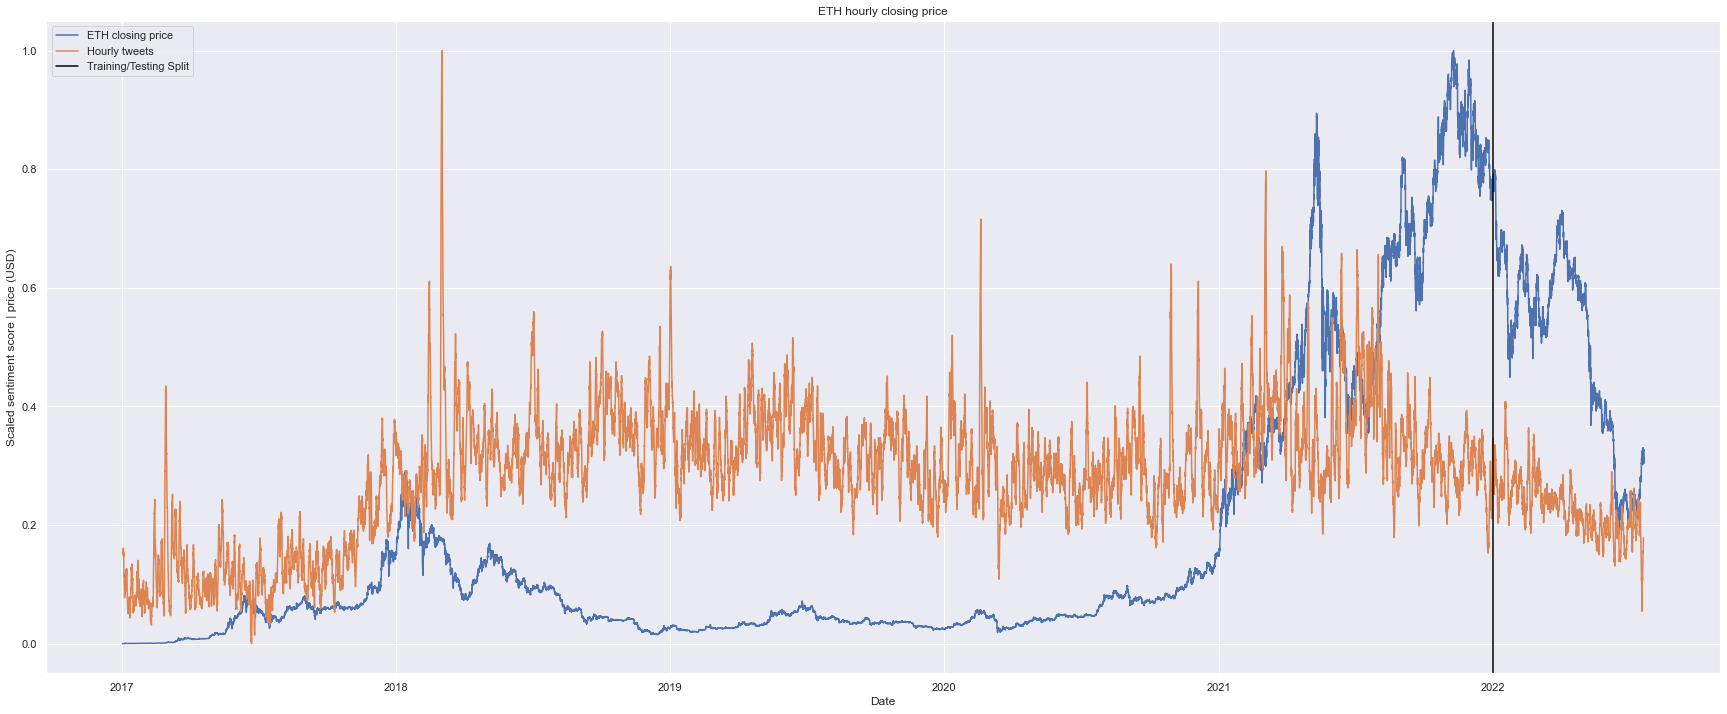

In [ ]:
sns.lineplot(x=mm_sent_df["datetime"], y=mm_eth_df["close"], label="ETH closing price").set(title='ETH hourly closing price', xlabel='Date', ylabel='Scaled sentiment score | price (USD)')
sns.lineplot(x="datetime", y="2d_avg_sentiment", label="Hourly tweets", data=mm_sent_df)
plt.axvline(x=pd.to_datetime("2022-01-01 00:00:00"), color='black', label='Training/Testing Split')
plt.legend(loc='upper left');

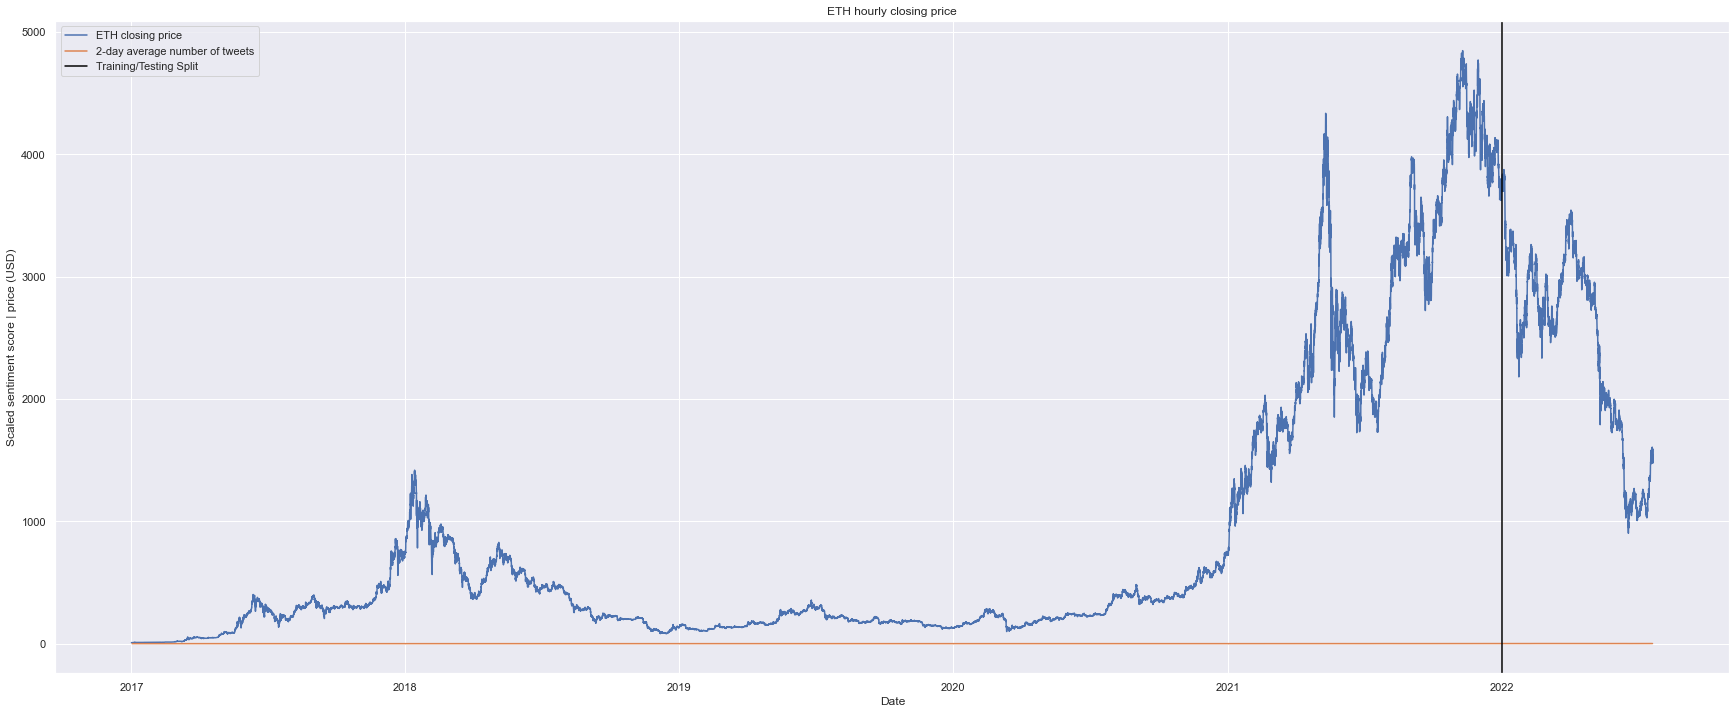

In [ ]:
sns.lineplot(x=mm_sent_df["datetime"], y=mm_eth_df["close"], label="ETH closing price").set(title='ETH hourly closing price', xlabel='Date', ylabel='Scaled sentiment score | price (USD)')
sns.lineplot(x="datetime", y="2d_avg_num_tweets", label="2-day average number of tweets", data=mm_sent_df)
plt.axvline(x=pd.to_datetime("2022-01-01 00:00:00"), color='black', label='Training/Testing Split')
plt.legend(loc='upper left');